Варіант 8

$$
f_1(x_1, x_2)= -2 x_1 + 2 x_2
$$
обмеження

$$
\begin{cases}
- x_1 + x_2 \leq 3, \\
3x_1 + x_2 \leq 11, \\
3x_1 + 5x_2 \geq 7.
\end{cases}
$$


In [25]:
from scipy.optimize import linprog

c_min = [-2, 2]  # Мінімізація (без змін)
c_max = [2, -2]  # Максимізація (перетворимо в мінімізацію)

# Коєфіцієнти обмежень (Ax <= b)
A = [[-1, 1],  # -x1 + x2 <= 3
     [3, 1],   # 3x1 + x2 <= 11
     [-3, -5]] # -3x1 - 5x2 <= -7

b = [3, 11, -7]

# Знаходимо мінімум функції
res_min = linprog(c_min, A_ub=A, b_ub=b, bounds=[(2, 5), (-2, 0)])

# Знаходимо максимум функції (через мінімізацію з протилежним знаком)
res_max = linprog(c_max, A_ub=A, b_ub=b, bounds=[(-2.5, 5), (-5, 5)])

# Виведемо результати
print(f"Мінімум функції: f1 = {res_min.fun}, при x1 = {res_min.x[0]}, x2 = {res_min.x[1]}")
print(f"Максимум функції: f1 = {-res_max.fun}, при x1 = {res_max.x[0]}, x2 = {res_max.x[1]}")


Мінімум функції: f1 = -10.0, при x1 = 4.0, x2 = -1.0
Максимум функції: f1 = 6.0, при x1 = -1.0, x2 = 2.0


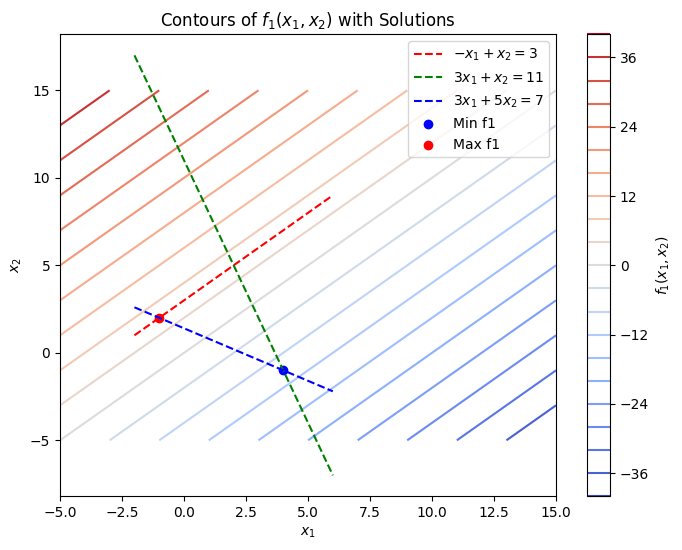

In [26]:
import numpy as np
import matplotlib.pyplot as plt

f1_function = lambda x: -2 * x[0] + 2 * x[1]

# Сітка значень
x1 = np.linspace(-5, 15, 100)
x2 = np.linspace(-5, 15, 100)
X1, X2 = np.meshgrid(x1, x2)

# Графічне представлення
fig, ax = plt.subplots(figsize=(8, 6))
x_vals = np.linspace(-2, 6, 200)

F1 = np.vectorize(lambda x1, x2: f1_function([x1, x2]))(X1, X2)
contour = ax.contour(X1, X2, F1, levels=20, cmap="coolwarm")
ax.set_title(f'Contours of $f_1(x_1, x_2)$ with Solutions')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
fig.colorbar(contour, ax=ax, label=f'$f_1(x_1, x_2)$')

# Додаємо обмеження як лінії
ax.plot(x_vals, x_vals + 3, 'r--', label=r'$-x_1 + x_2 = 3$')
ax.plot(x_vals, 11 - 3*x_vals, 'g--', label=r'$3x_1 + x_2 = 11$')
ax.plot(x_vals, (7 - 3*x_vals) / 5, 'b--', label=r'$3x_1 + 5x_2 = 7$')

ax.scatter(res_min.x[0], res_min.x[1], color='blue', marker='o', label='Min f1')
ax.scatter(res_max.x[0], res_max.x[1], color='red', marker='o', label='Max f1')
ax.legend()

plt.show()
